isPositive: True
isPositive: True
line: A: 1000, B: -1000, C: 1000000
min x: 8000.0, max x: 11000.0
min y: 7000.0, max y: 10000.0
Line details: A = 1000, B = -1000, C = 1000000
Angle of inclination: 45.0 degrees


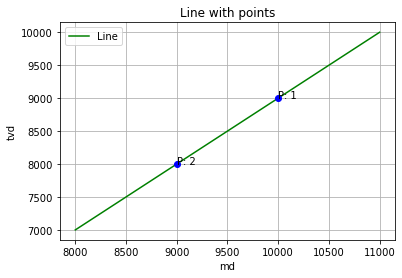

In [2]:
import matplotlib.pyplot as plt
import numpy as np

class Line:
    def __init__(self, A, B, C):
        self.A = A
        self.B = B
        self.C = C

    @staticmethod
    def from_two_points(p1, p2):
        """Create a line from two points."""
        x1, y1 = p1.md, p1.tvd
        x2, y2 = p2.md, p2.tvd
        if x1 == x2:  # Avoid division by zero
            return Line(1, 0, x1)
        A = -(y2 - y1)
        B = x2 - x1
        C = A * x1 + B * y1
        return Line(A, B, C)

    @staticmethod
    def from_angle_point(angle, p):
        """Create a line from an angle and a point."""
        px, py = p.md, p.tvd
        if abs(angle - 90) < 0.01 or abs(angle + 90) < 0.01:
            A = 1
            B = 0
            C = -px
        else:
            # Convert angle from degrees to radians
            angle_rad = np.deg2rad(angle)
            A = np.tan(angle_rad)
            B = -1
            C = py - A * px
        return Line(A, B, C)

    def get_angle(self):
        if self.B != 0:
            angle_rad = np.arctan(-self.A / self.B)  # in radians
            angle_deg = np.rad2deg(angle_rad)  # convert to degrees
            return angle_deg
        else:
            return None
    def is_positive_side(self, p):
        """Check if a point is on the positive side of the line."""
        return (self.A * p.md + self.B * p.tvd - self.C) >= 0

    def print_details(self):
        print(f'Line details: A = {self.A}, B = {self.B}, C = {self.C}')
        
        angle = self.get_angle()
        if angle is not None:
            print(f'Angle of inclination: {angle} degrees')
        else:
            print('The line is vertical, the angle of inclination is undefined.')

class Point2D:
    def __init__(self, md, tvd):
        self.md = md
        self.tvd = tvd

points = [
    #Point2D(9999.000000001313, 10199.8134765625),
    #Point2D(10002.000000001324, 7486.134356717739),
    Point2D(10000, 9000),
    Point2D(9000, 8000),
    #Point2D(11000, 10000),
    #Point2D(10002.000000001324, 10199.5546875)
]

###
# Initialize the line

# A vertical line at x = 10000
#line = Line(1, 0, -10000)
#line = Line(1, 0, -10001.00000000132)

# a horizontal line
#line = Line(-0.5587890625, -3.400000000010914, -34187.07226573666)
#surfaceLine
#line = Line(-0.2587890625, -3.000000000010914, -33187.07226573666)


#line = Line(-57.28996163075955, 1.0, 580500.3305876505)
#line = Line.from_angle_point(45, 9000, 10000)
#line = Line.from_angle_point(45, 10000, 9000)

#line = Line.from_two_points(10000, 10000, 9000, 10000)


line = Line.from_two_points(points[0], points[1])
#line = Line.from_angle_point(45, points[0])

# Print whether each point is on the positive side of the line
for point in points:
    print(f'isPositive: {line.is_positive_side(point)}')

print(f'line: A: {line.A}, B: {line.B}, C: {line.C}')

# Plot the line
x = np.linspace(8000, 11000, 2)
print(f'min x: {min(x)}, max x: {max(x)}')

y = (line.C - line.A * x) / line.B
print(f'min y: {min(y)}, max y: {max(y)}')
line.print_details()

# If B is not zero, compute y normally. Otherwise, draw a vertical line.
if line.B != 0:
    y = (line.C - line.A * x) / line.B
    plt.plot(x, y, '-g', label='Line')
else:
    plt.axvline(x=-line.C / line.A, color='r', label='Line')
###

# Plot the points and label them
for i, point in enumerate(points):
    plt.plot(point.md, point.tvd, 'bo')
    plt.text(point.md, point.tvd, f'P: {i + 1}')

plt.title('Line with points')
plt.xlabel('md')
plt.ylabel('tvd')
plt.legend(loc='best')
plt.grid()

# Set the y-axis limits to properly display the points
#plt.ylim(7000, 11000)

plt.show()
